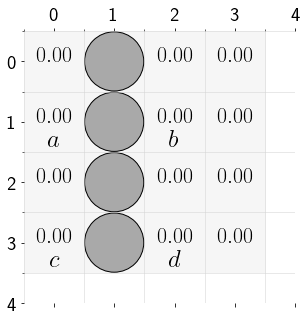

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from csrl.mdp import GridMDP
import numpy as np 

shape = n_cols, n_rows = (4,4)

structure = np.array([
['E','B','E','E'],
['E','B','E','E'],
['E','B','E','E'],
['E','B','E','E'],
['E','E','E','E']
])

label = np.empty(shape,dtype=object)
label.fill(())
label[1,0] = ('a',)
label[1,2] = ('b',)
label[3,0] = ('c',)
label[3,2] = ('d',)
    
grid_mdp = GridMDP(shape=shape,structure=structure,label=label,figsize=5)
grid_mdp.plot()

In [2]:
from csrl.oa import OmegaAutomaton

# LTL Specification
ltl1 = '(!a U b) & F d & FG c'
ltl2 = 'F(b U a) & F c & FG d' # LTL seems to have to contain all labels for MDP

# Translate the LTL formula to an LDBA
oa1 = OmegaAutomaton(ltl1)
oa2 = OmegaAutomaton(ltl2)

print('Number of Omega-automaton states (including the trap state):',oa1.shape[1])
print('Number of Omega-automaton states (including the trap state):',oa2.shape[1])


Number of Omega-automaton states (including the trap state): 6
Number of Omega-automaton states (including the trap state): 6


In [3]:
from csrl import ControlSynthesis
import numpy as np 

# Construct product MDPs
csrl1 = ControlSynthesis(grid_mdp,oa1)

csrl2 = ControlSynthesis(grid_mdp,oa2) 

In [4]:
csrl2.oa.delta

[{(): 0,
  ('a',): 1,
  ('b',): 0,
  ('c',): 3,
  ('d',): 0,
  ('a', 'b'): 1,
  ('a', 'c'): 2,
  ('a', 'd'): 1,
  ('b', 'c'): 3,
  ('b', 'd'): 0,
  ('c', 'd'): 3,
  ('a', 'b', 'c'): 2,
  ('a', 'b', 'd'): 1,
  ('a', 'c', 'd'): 2,
  ('b', 'c', 'd'): 3,
  ('a', 'b', 'c', 'd'): 2},
 {(): 1,
  ('a',): 1,
  ('b',): 1,
  ('c',): 2,
  ('d',): 1,
  ('a', 'b'): 1,
  ('a', 'c'): 2,
  ('a', 'd'): 1,
  ('b', 'c'): 2,
  ('b', 'd'): 1,
  ('c', 'd'): 2,
  ('a', 'b', 'c'): 2,
  ('a', 'b', 'd'): 1,
  ('a', 'c', 'd'): 2,
  ('b', 'c', 'd'): 2,
  ('a', 'b', 'c', 'd'): 2},
 {(): 2,
  ('a',): 2,
  ('b',): 2,
  ('c',): 2,
  ('d',): 2,
  ('a', 'b'): 2,
  ('a', 'c'): 2,
  ('a', 'd'): 2,
  ('b', 'c'): 2,
  ('b', 'd'): 2,
  ('c', 'd'): 2,
  ('a', 'b', 'c'): 2,
  ('a', 'b', 'd'): 2,
  ('a', 'c', 'd'): 2,
  ('b', 'c', 'd'): 2,
  ('a', 'b', 'c', 'd'): 2},
 {(): 3,
  ('a',): 2,
  ('b',): 3,
  ('c',): 3,
  ('d',): 3,
  ('a', 'b'): 2,
  ('a', 'c'): 2,
  ('a', 'd'): 2,
  ('b', 'c'): 3,
  ('b', 'd'): 3,
  ('c', 'd'): 3,


In [5]:
st = (1,2,1,0)
lab = csrl2.mdp.label[st[2:]]+csrl1.mdp.label[1,2]
lab

('a', 'b')

In [6]:
csrl2.oa.delta[2][lab]

2

In [7]:
from multi import MultiControlSynthesis

mcsrl = MultiControlSynthesis([csrl1,csrl2], mdp=grid_mdp)


In [8]:
mcsrl.combined_qlearning(T=100, K=1000)

[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 1 3]]
[[0 4 0 0]
 [0 0 0 3]]
[[0 4 0 0]
 [0 0 0 3]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 2 0]
 [0 1 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 2 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 2 0]
 [0 2 3 3]]
[[0 4 1 0]
 [0 2 2 3]]
[[0 4 2 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 1 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 2 3]]
[[0 1 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 4 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]


[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]


 [0 1 2 2]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 4 3 2]]
[[0 5 3 0]
 [0 4 3 2]]
[[0 5 3 0]
 [0 4 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 2 0]
 [0 1 2 3]]

[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]


[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 2 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 0 0]
 [0 1 0 3]]
[[0 4 0 0]
 [0 1 0 3]]
[[0 4 0 0]


 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]

 [0 0 1 3]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 2 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 0 0]
 [0 1 2 2]]
[[0 4 0 0]
 [0 1 2 3]]
[[0 4 0 0]
 [0 1 1 3]]
[[0 4 0 0]
 [0 1 1 3]]
[[0 4 0 0]
 [0 1 1 2]]
[[0 4 0 0]
 [0 1 1 3]]
[[0 4 0 0]
 [0 1 2 3]]
[[0 4 0 0]
 [0 1 2 3]]
[[0 4 1 0]
 [0 1 3 3]]
[[0 4 2 0]
 [0 1 3 3]]
[[0 1 2 0]
 [0 1 3 2]]
[[0 1 2 0]
 [0 1 3 2]]
[[0 1 2 0]
 [0 1 2 2]]
[[0 5 2 0]
 [0 1 3 2]]
[[0 5 2 0]
 [0 1 3 3]]
[[0 5 2 0]
 [0 1 3 2]]
[[0 5 2 0]
 [0 1 3 3]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]

[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 2 0]
 [0 1 3 2]]
[[0 5 2 0]
 [0 1 3 2]]
[[0 5 3 0]


[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 1 3]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 0 0]
 [0 1 0 2]]
[[0 4 0 0]
 [0 1 0 2]]
[[0 4 0 0]
 [0 1 0 2]]
[[0 4 0 0]
 [0 1 0 2]]
[[0 4 0 0]
 [0 1 0 3]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 1 0]


[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]


[[0 4 0 0]
 [0 5 0 2]]
[[0 4 1 0]
 [0 5 0 3]]
[[0 4 1 0]
 [0 5 0 3]]
[[0 4 0 0]
 [0 5 0 3]]
[[0 4 0 0]
 [0 5 0 3]]
[[0 4 0 0]
 [0 5 0 3]]
[[0 4 0 0]
 [0 5 0 2]]
[[0 4 1 0]
 [0 5 0 3]]
[[0 4 1 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 1 0]
 [0 5 1 2]]
[[0 4 1 0]
 [0 5 1 2]]
[[0 4 1 0]
 [0 5 2 2]]
[[0 4 1 0]
 [0 5 2 2]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 2 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 2 0]
 [0 5 3 3]]
[[0 1 2 0]
 [0 5 3 2]]
[[0 1 3 0]
 [0 5 3 3]]
[[0 1 3 0]
 [0 5 2 3]]
[[0 1 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]


 [0 0 0 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 0 0]
 [0 1 1 3]]
[[0 4 0 0]
 [0 1 1 2]]
[[0 4 0 0]
 [0 1 0 2]]
[[0 4 0 0]
 [0 1 1 2]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 0 0]
 [0 1 2 2]]
[[0 4 0 0]
 [0 1 2 3]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 0 0]
 [0 1 2 2]]
[[0 1 0 0]
 [0 1 3 2]]
[[0 1 1 0]
 [0 1 3 3]]
[[0 1 1 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 1 3]]

 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 2 0]
 [0 2 0 3]]
[[0 4 2 0]
 [0 2 0 2]]
[[0 4 2 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 2 0]
 [0 5 2 3]]

 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 2 2]]

 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]

[[0 5 3 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]


[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 2 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 5 1 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 2 3]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 2 0]
 [0 1 2 3]]
[[0 5 1 0]
 [0 1 2 3]]
[[0 5 2 0]
 [0 1 1 3]]
[[0 5 2 0]


 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 0 3]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 5 0 3]]

 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]

[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]


[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 2 0]
 [0 1 2 3]]
[[0 5 2 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 2 0]
 [0 1 2 2]]
[[0 5 2 0]
 [0 1 2 2]]
[[0 5 2 0]
 [0 1 2 2]]
[[0 5 2 0]
 [0 1 2 3]]
[[0 5 2 0]
 [0 1 3 3]]
[[0 5 2 0]
 [0 1 3 2]]
[[0 5 2 0]
 [0 1 3 2]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 3 2]]
[[0 5 0 0]
 [0 4 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]


 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 2]]

 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]

 [0 2 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]

 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 1 3]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]

 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 0 3]]
[[0 4 0 0]
 [0 0 0 3]]
[[0 4 0 0]
 [0 0 0 3]]
[[0 4 0 0]
 [0 0 0 3]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]

[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]


[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 2 0]


[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]


 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]

 [0 2 2 2]]
[[0 1 2 0]
 [0 2 3 2]]
[[0 1 1 0]
 [0 4 3 2]]
[[0 1 1 0]
 [0 4 3 2]]
[[0 1 1 0]
 [0 4 3 2]]
[[0 1 2 0]
 [0 4 3 2]]
[[0 1 2 0]
 [0 4 3 2]]
[[0 1 3 0]
 [0 4 3 2]]
[[0 1 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]

[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 0 3]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]


[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 0 0]
 [0 1 1 3]]
[[0 4 1 0]
 [0 1 2 3]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 1 0]
 [0 1 2 2]]
[[0 4 1 0]
 [0 1 2 3]]
[[0 4 2 0]
 [0 1 3 3]]
[[0 4 3 0]


[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 0 0]
 [0 1 1 2]]
[[0 4 0 0]
 [0 1 1 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 0 0]
 [0 1 0 2]]
[[0 4 0 0]
 [0 1 0 2]]
[[0 4 0 0]
 [0 1 1 2]]
[[0 4 0 0]


[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]


 [0 1 2 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 2 3]]
[[0 5 2 0]
 [0 1 2 3]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 2 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]

 [0 1 2 3]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 2 3]]
[[0 5 1 0]
 [0 1 2 3]]
[[0 5 2 0]
 [0 1 1 3]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 4 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]

[[0 4 0 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 1 3]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 0 0]
 [0 1 0 3]]
[[0 4 0 0]
 [0 1 0 2]]
[[0 4 0 0]
 [0 1 1 2]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 0 0]
 [0 1 0 3]]
[[0 4 0 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 0 0]
 [0 1 1 3]]
[[0 4 0 0]
 [0 1 2 3]]
[[0 4 0 0]
 [0 1 3 3]]
[[0 4 0 0]
 [0 1 3 3]]
[[0 4 1 0]
 [0 1 3 3]]
[[0 1 1 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 1 0]


 [0 5 2 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 0 3]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]

 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 1 2]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 5 0 3]]

[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]


[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 2 0]


 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]

 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 2 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 1 0]
 [0 5 1 3]]
[[0 4 1 0]
 [0 5 0 3]]
[[0 4 1 0]
 [0 5 1 3]]
[[0 4 1 0]
 [0 5 2 3]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 1 0]
 [0 5 1 3]]
[[0 4 1 0]
 [0 5 1 3]]
[[0 4 1 0]
 [0 5 1 3]]
[[0 4 1 0]
 [0 5 2 3]]
[[0 4 2 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]

[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 3 0]


[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]


[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]


 [0 5 1 3]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 1 0]
 [0 5 0 2]]
[[0 4 0 0]
 [0 5 0 2]]
[[0 4 1 0]
 [0 5 0 2]]
[[0 4 0 0]
 [0 5 0 2]]
[[0 4 1 0]
 [0 5 0 2]]
[[0 4 0 0]
 [0 5 0 2]]
[[0 4 0 0]
 [0 5 0 3]]
[[0 4 1 0]
 [0 5 0 3]]
[[0 4 0 0]
 [0 5 0 2]]
[[0 4 1 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 1 0]
 [0 5 0 3]]
[[0 4 1 0]
 [0 5 0 3]]
[[0 4 0 0]
 [0 5 1 3]]
[[0 4 1 0]
 [0 5 2 3]]
[[0 4 1 0]
 [0 5 1 3]]
[[0 4 1 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 1 2 0]
 [0 5 3 2]]
[[0 1 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]

[[0 5 0 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 1 2]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 2 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 2 3]]
[[0 5 2 0]
 [0 1 2 2]]
[[0 5 2 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 2 0]
 [0 1 3 2]]
[[0 5 2 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 2 3]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 2 0]
 [0 1 2 2]]
[[0 5 2 0]


 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 2 0]
 [0 1 1 2]]
[[0 5 2 0]
 [0 1 1 3]]
[[0 5 2 0]
 [0 1 1 3]]
[[0 5 2 0]
 [0 1 2 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]

 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 0 2]]

 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]

[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 2 0]
 [0 1 3 2]]
[[0 5 2 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 1 2]]
[[0 5 2 0]
 [0 1 2 2]]
[[0 5 2 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 2 0]
 [0 1 3 2]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]


[[0 4 1 0]
 [0 1 1 3]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 0 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 0 0]
 [0 1 1 3]]
[[0 4 0 0]
 [0 1 2 3]]
[[0 4 0 0]
 [0 1 3 3]]
[[0 4 0 0]
 [0 1 3 3]]
[[0 4 0 0]
 [0 1 2 3]]
[[0 4 1 0]
 [0 1 2 2]]
[[0 1 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 1 0]
 [0 1 2 3]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 2 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 2 0]
 [0 1 2 3]]
[[0 5 2 0]
 [0 1 3 3]]
[[0 5 2 0]
 [0 1 3 2]]
[[0 5 2 0]
 [0 1 2 2]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]


[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 2 0]
 [0 1 3 2]]
[[0 5 2 0]
 [0 1 2 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 4 3 2]]
[[0 5 1 0]
 [0 4 3 2]]
[[0 5 1 0]
 [0 4 3 2]]
[[0 5 0 0]
 [0 4 3 2]]
[[0 5 0 0]
 [0 4 3 2]]
[[0 5 1 0]
 [0 4 3 2]]
[[0 5 1 0]
 [0 4 3 2]]
[[0 5 0 0]
 [0 4 3 2]]
[[0 5 0 0]
 [0 4 3 2]]
[[0 5 1 0]
 [0 4 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 0 0]


[[0 5 0 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 2 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 2 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 2 0]
 [0 1 3 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 4 3 2]]
[[0 5 2 0]
 [0 4 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]


[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 2 0]
 [0 1 3 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]


 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 2 2]]
[[0 4 1 0]
 [0 1 2 2]]
[[0 1 1 0]
 [0 1 3 2]]
[[0 1 1 0]
 [0 1 3 2]]
[[0 1 1 0]
 [0 1 3 3]]
[[0 1 1 0]
 [0 1 2 3]]
[[0 1 2 0]
 [0 1 2 2]]
[[0 1 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 4 3 2]]
[[0 5 2 0]
 [0 4 3 2]]
[[0 5 2 0]
 [0 4 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]

[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]


 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]

 [0 2 1 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]

[[0 4 0 0]
 [0 1 0 3]]
[[0 4 0 0]
 [0 1 1 3]]
[[0 4 0 0]
 [0 1 1 3]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 2 0]
 [0 2 2 2]]
[[0 4 2 0]
 [0 2 2 2]]
[[0 4 2 0]
 [0 2 2 2]]
[[0 1 2 0]
 [0 2 3 2]]
[[0 1 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]


[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 2 3]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]


 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 2 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 2 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 2 0]
 [0 2 3 2]]
[[0 1 2 0]
 [0 2 3 2]]
[[0 1 3 0]
 [0 2 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 1 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 2 2]]
[[0 5 0 0]
 [0 2 2 3]]
[[0 5 0 0]
 [0 2 2 2]]

[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 2 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 0 0]
 [0 1 1 2]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 2 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 2 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 3 0]


[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 0 0]
 [0 1 0 2]]
[[0 4 0 0]
 [0 1 0 2]]
[[0 4 1 0]


[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 0 0]


 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]

 [0 5 0 3]]
[[0 4 1 0]
 [0 5 0 3]]
[[0 4 0 0]
 [0 5 1 3]]
[[0 4 0 0]
 [0 5 0 3]]
[[0 4 1 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 1 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 1 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 1 0]
 [0 5 1 2]]
[[0 4 1 0]
 [0 5 0 2]]
[[0 4 1 0]
 [0 5 0 2]]
[[0 4 1 0]
 [0 5 0 2]]
[[0 4 1 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 1 0]
 [0 5 1 2]]
[[0 4 1 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 1 0]
 [0 5 3 3]]
[[0 4 0 0]
 [0 5 2 3]]
[[0 4 1 0]
 [0 5 2 3]]
[[0 4 0 0]
 [0 5 2 3]]
[[0 4 1 0]
 [0 5 3 3]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 1 0]
 [0 5 2 3]]

 [0 1 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]

[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 2 0]
 [0 5 2 2]]
[[0 4 1 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]


[[0 1 1 0]
 [0 5 3 2]]
[[0 1 2 0]
 [0 5 3 3]]
[[0 1 2 0]
 [0 5 3 3]]
[[0 1 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 2 0]
 [0 2 2 3]]
[[0 4 2 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 1 0]
 [0 5 0 2]]
[[0 4 1 0]
 [0 5 0 3]]
[[0 4 1 0]
 [0 5 0 2]]
[[0 4 1 0]
 [0 5 1 2]]
[[0 4 1 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 1 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 2 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 2 0]
 [0 5 2 2]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]


[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 1 3]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]


[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 2 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 2 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 1 2]]
[[0 5 2 0]
 [0 1 2 2]]
[[0 5 2 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 0 0]


 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 0 3]]

[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]


[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]


[[0 5 2 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]


[[0 4 3 0]
 [0 2 1 2]]
[[0 4 2 0]
 [0 2 1 2]]
[[0 4 2 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 2 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 1 3 0]
 [0 5 3 2]]
[[0 1 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]


[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 0 0]
 [0 1 1 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 0 0]
 [0 1 2 2]]
[[0 4 1 0]
 [0 1 2 3]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 1 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]


 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 2 2]]

[[0 5 3 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 1 0]
 [0 2 3 2]]
[[0 5 1 0]
 [0 2 3 3]]
[[0 5 1 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]


[[0 4 2 0]
 [0 1 1 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 1 0]
 [0 1 2 2]]
[[0 4 2 0]
 [0 1 2 2]]
[[0 4 1 0]
 [0 1 2 2]]
[[0 4 2 0]
 [0 1 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 2 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 1 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]


[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]


[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 2 2]]
[[0 4 0 0]
 [0 1 2 3]]
[[0 4 0 0]
 [0 1 2 3]]
[[0 4 1 0]
 [0 1 2 2]]
[[0 4 2 0]
 [0 1 2 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 1 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 1 3 0]
 [0 5 3 2]]
[[0 1 3 0]
 [0 5 3 2]]
[[0 1 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]


 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 2 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 2 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]

 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 2]]

[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 2 0]


[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]


[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]


[[0 4 2 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 2 0]


[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]


 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 0 3]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 1 0]
 [0 2 0 3]]
[[0 5 1 0]
 [0 2 0 3]]
[[0 5 1 0]
 [0 2 0 3]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 1 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 1 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]

[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 2 0]


 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]

 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]

[[0 1 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]


[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]


[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 2 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 2 0]
 [0 2 2 2]]
[[0 4 2 0]
 [0 2 2 3]]
[[0 4 2 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 2 0]
 [0 2 3 3]]
[[0 1 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 2 2]]
[[0 5 0 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]


[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 2 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 2 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 2 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]


[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]


 [0 5 1 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 2 2]]
[[0 1 2 0]
 [0 1 3 2]]
[[0 5 2 0]
 [0 1 3 2]]
[[0 5 2 0]
 [0 1 2 2]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 1 0]
 [0 2 3 3]]
[[0 5 1 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 3 3]]
[[0 5 1 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]

[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 2 0]
 [0 2 2 3]]
[[0 4 2 0]
 [0 2 2 3]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 1 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]


 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 2 2]]

[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]


[[0 1 3 0]
 [0 5 0 2]]
[[0 1 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]


[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]


 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 1 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]

[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 1 3 0]
 [0 5 3 2]]
[[0 1 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]


[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]


 [0 1 0 3]]
[[0 4 2 0]
 [0 1 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]

[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 1 3]]
[[0 5 2 0]
 [0 1 1 2]]
[[0 5 2 0]
 [0 1 1 3]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 0 0]
 [0 2 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]


 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 0 0]
 [0 1 2 3]]
[[0 4 0 0]
 [0 1 3 3]]
[[0 4 1 0]
 [0 1 2 3]]
[[0 4 2 0]
 [0 1 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 4 3 2]]
[[0 2 3 0]
 [0 4 3 2]]
[[0 2 3 0]
 [0 4 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]

 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 2 2]]
[[0 4 1 0]
 [0 5 2 3]]
[[0 4 1 0]
 [0 5 1 3]]
[[0 4 1 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 1 0]
 [0 5 0 3]]
[[0 4 1 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 1 3 0]
 [0 5 3 2]]
[[0 1 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]

[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 2 0]
 [0 1 1 2]]
[[0 5 3 0]


 [0 5 1 3]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 2 0]
 [0 2 2 3]]
[[0 4 2 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 3]]

[[0 4 2 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 1 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 1 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 1 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 2 0]
 [0 5 3 3]]
[[0 1 3 0]


[[0 4 2 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 2 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 2 0]
 [0 5 2 2]]
[[0 1 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]


[[0 5 1 0]
 [0 2 0 3]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]


 [0 5 1 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 2 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 1 3 0]
 [0 5 3 2]]
[[0 1 3 0]
 [0 5 3 3]]
[[0 1 3 0]
 [0 5 3 3]]
[[0 1 3 0]
 [0 5 3 3]]
[[0 1 2 0]
 [0 5 3 3]]
[[0 1 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]

[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 2 0]
 [0 1 2 3]]
[[0 5 2 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]


 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 1 3]]

[[0 4 3 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 1 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 1 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 1 0]
 [0 5 2 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 1 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 1 0]
 [0 5 2 3]]
[[0 4 2 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 2 0]


 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 0 3]]

 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 2 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 2 0]
 [0 2 0 2]]
[[0 4 2 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 2 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 2 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 1 0]
 [0 5 1 2]]
[[0 4 0 0]
 [0 5 2 2]]
[[0 4 1 0]
 [0 5 1 2]]
[[0 4 1 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 2 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 2 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 1 2 0]
 [0 5 3 2]]
[[0 1 2 0]
 [0 5 2 2]]

[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 2 2]]
[[0 4 2 0]
 [0 1 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 2 0]
 [0 2 1 3]]
[[0 4 1 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 2 2]]
[[0 1 2 0]
 [0 5 3 2]]
[[0 1 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]


 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 2 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 2 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 1 2 0]
 [0 5 3 2]]
[[0 1 2 0]
 [0 5 3 2]]
[[0 1 2 0]
 [0 5 3 3]]
[[0 1 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 2 3]]

[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]


[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 1 0]
 [0 5 1 2]]
[[0 4 0 0]
 [0 5 1 3]]
[[0 4 0 0]
 [0 5 0 3]]
[[0 4 0 0]
 [0 5 0 3]]
[[0 4 0 0]
 [0 5 0 3]]
[[0 4 1 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 0 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 2 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 2 2]]
[[0 4 2 0]
 [0 5 2 2]]
[[0 1 2 0]
 [0 5 3 2]]
[[0 1 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 0 0 0]


 [0 2 2 3]]
[[0 5 0 0]
 [0 2 3 3]]
[[0 5 0 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 1 0]
 [0 2 0 2]]
[[0 5 1 0]
 [0 2 0 3]]
[[0 5 1 0]
 [0 2 0 3]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 1 0]
 [0 2 0 3]]
[[0 5 1 0]
 [0 2 0 2]]
[[0 5 1 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 0 0]
 [0 2 1 3]]
[[0 5 0 0]
 [0 2 1 3]]
[[0 5 0 0]
 [0 2 1 2]]
[[0 5 0 0]
 [0 2 1 2]]
[[0 5 0 0]
 [0 2 1 2]]
[[0 5 0 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 1 0]
 [0 4 3 2]]
[[0 5 2 0]
 [0 4 3 2]]
[[0 5 3 0]
 [0 4 3 2]]
[[0 5 3 0]
 [0 4 3 2]]
[[0 5 3 0]
 [0 4 3 2]]
[[0 5 3 0]
 [0 4 3 2]]
[[0 5 3 0]
 [0 4 3 2]]
[[0 5 3 0]
 [0 4 3 2]]
[[0 5 3 0]
 [0 4 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]

 [0 2 1 2]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 1 0]
 [0 2 3 3]]
[[0 5 1 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]

[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]


[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 2 2]]
[[0 4 0 0]
 [0 0 2 2]]
[[0 4 0 0]
 [0 0 2 2]]
[[0 4 1 0]
 [0 1 2 2]]
[[0 1 0 0]
 [0 1 3 2]]
[[0 1 1 0]
 [0 1 2 2]]
[[0 1 2 0]
 [0 1 1 2]]
[[0 1 2 0]
 [0 1 2 2]]
[[0 1 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 2 2]]
[[0 5 0 0]
 [0 2 2 2]]
[[0 5 0 0]
 [0 2 3 2]]
[[0 5 0 0]
 [0 2 3 2]]
[[0 5 1 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 0 2]]
[[0 5 2 0]


[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 2 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]


[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 2 0]


[[0 2 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 2 0]


[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]


[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]


 [0 5 3 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 1 0]
 [0 1 2 3]]
[[0 5 1 0]
 [0 1 2 3]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 2 0]
 [0 1 1 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 0 3]]
[[0 5 1 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 1 0]
 [0 2 0 2]]
[[0 5 1 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 1 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 1 3]]

[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 2 0]
 [0 2 1 2]]
[[0 4 2 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 2 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 2 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 2 0]
 [0 2 0 2]]
[[0 4 2 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 2 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 2 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 2 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 2 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 1 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]


[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 0 3]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 2 0]
 [0 2 1 2]]
[[0 4 2 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 2 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 2 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 2 0]
 [0 2 1 2]]
[[0 4 2 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 2 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 2 0]
 [0 2 0 2]]
[[0 4 2 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 2 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 2 0]
 [0 2 1 2]]
[[0 4 1 0]
 [0 2 1 2]]
[[0 4 1 0]
 [0 2 0 2]]
[[0 4 1 0]
 [0 2 0 2]]
[[0 4 1 0]
 [0 2 0 3]]
[[0 4 2 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 2 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 2 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 2 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 2 0]


 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 3 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 0 0]
 [0 1 3 2]]

[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 2 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 1 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]


 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 1 0]
 [0 2 3 3]]
[[0 5 1 0]
 [0 2 3 2]]
[[0 5 1 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]

[[0 5 0 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 0 2]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 0 3]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]


[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 2 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 2 3]]
[[0 5 1 0]
 [0 1 2 2]]
[[0 5 1 0]
 [0 1 3 2]]
[[0 5 2 0]
 [0 1 2 2]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 3 3]]
[[0 5 0 0]
 [0 2 3 3]]
[[0 5 0 0]
 [0 2 3 2]]
[[0 5 0 0]
 [0 2 3 2]]
[[0 5 0 0]
 [0 2 3 2]]
[[0 5 1 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 1 2]]
[[0 5 0 0]


[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 0 3]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 2 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]


[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 2 2]]
[[0 4 2 0]
 [0 1 2 2]]
[[0 4 2 0]
 [0 1 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]


 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 1 0]
 [0 2 3 2]]
[[0 5 0 0]
 [0 2 3 3]]
[[0 5 0 0]
 [0 2 3 2]]
[[0 5 1 0]
 [0 2 3 2]]
[[0 5 1 0]
 [0 2 3 2]]
[[0 5 0 0]
 [0 2 2 2]]
[[0 5 0 0]
 [0 2 2 2]]
[[0 5 0 0]
 [0 2 1 2]]
[[0 5 0 0]
 [0 2 2 2]]
[[0 5 0 0]
 [0 2 3 2]]
[[0 5 0 0]
 [0 2 3 3]]
[[0 5 1 0]
 [0 2 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 1 3]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 1 2]]

 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 2]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 3]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]

[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 1 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]


 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 2 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]

[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 0 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 3 3]]
[[0 5 1 0]
 [0 2 3 3]]
[[0 5 1 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 1 0]
 [0 2 3 2]]
[[0 5 0 0]
 [0 2 3 2]]
[[0 5 0 0]
 [0 2 3 3]]
[[0 5 1 0]
 [0 2 3 3]]
[[0 5 0 0]
 [0 2 3 2]]
[[0 5 0 0]


[[0 5 3 0]
 [0 5 3 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]


[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 1 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 1 2]]
[[0 5 0 0]
 [0 5 2 2]]
[[0 5 0 0]
 [0 5 2 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 0 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 5 0 0]
 [0 5 0 2]]
[[0 5 1 0]
 [0 5 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]


[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 1 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]


[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 2 2]]
[[0 5 0 0]
 [0 2 1 2]]
[[0 5 0 0]
 [0 2 1 3]]
[[0 5 0 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 1 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]


 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]

[[0 4 3 0]
 [0 2 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]


 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 3 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 2]]
[[0 4 3 0]
 [0 5 2 3]]
[[0 4 3 0]
 [0 5 2 3]]

[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 1 3]]
[[0 4 3 0]
 [0 5 1 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 2]]
[[0 4 3 0]
 [0 5 0 3]]
[[0 4 3 0]


 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]

 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 2 2]]

[[0 5 0 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 0 3]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 1 2]]
[[0 5 0 0]
 [0 1 1 3]]
[[0 5 1 0]
 [0 1 1 3]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 2 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 0 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 1 0]
 [0 1 2 3]]
[[0 5 1 0]
 [0 1 3 3]]
[[0 5 2 0]
 [0 1 3 3]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 1 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]


[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]


[[0 2 3 0]
 [0 5 2 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 3 0]
 [0 5 0 3]]
[[0 5 2 0]
 [0 5 0 2]]
[[0 5 1 0]


[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]


[[0 5 1 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 5 1 0]
 [0 1 0 2]]
[[0 5 2 0]
 [0 1 0 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 1 0]
 [0 2 0 2]]
[[0 5 1 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 1 2]]
[[0 5 0 0]
 [0 2 1 3]]
[[0 5 0 0]
 [0 2 2 3]]
[[0 5 0 0]
 [0 2 2 3]]
[[0 5 0 0]
 [0 2 1 3]]
[[0 5 0 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 0 0]
 [0 2 0 3]]
[[0 5 0 0]
 [0 2 0 3]]
[[0 5 0 0]
 [0 2 0 3]]
[[0 5 0 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 0 3]]
[[0 5 0 0]


 [0 2 0 3]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 1 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]

[[0 5 3 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 0 0]
 [0 2 2 3]]
[[0 5 0 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]


 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 3 0]
 [0 5 0 2]]
[[0 5 2 0]
 [0 5 1 2]]
[[0 5 2 0]
 [0 5 1 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]

[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]


[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]


[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]


 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]

 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]

[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]


 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]

[[0 2 3 0]
 [0 2 2 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]


[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]


[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]


[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]


[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]


 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]

 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]

[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]


[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 1 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]


[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]


[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 4 3 2]]
[[0 2 3 0]
 [0 4 3 2]]
[[0 2 3 0]
 [0 4 3 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]


 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]

[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]


[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 3 0]


 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 0 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 0 0]
 [0 2 0 3]]
[[0 5 0 0]
 [0 2 0 3]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 3]]
[[0 5 0 0]
 [0 2 0 3]]
[[0 5 0 0]
 [0 2 1 3]]
[[0 5 0 0]
 [0 2 1 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 3]]
[[0 5 0 0]
 [0 2 0 3]]
[[0 5 0 0]
 [0 2 1 3]]
[[0 5 0 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 1 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 1 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 3 3]]

[[0 5 3 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 1 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 1 0]
 [0 2 0 3]]
[[0 5 1 0]
 [0 2 0 3]]
[[0 5 0 0]
 [0 2 0 3]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 1 2]]
[[0 5 0 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 2 2]]
[[0 5 1 0]
 [0 2 1 2]]
[[0 5 0 0]
 [0 2 1 3]]
[[0 5 0 0]
 [0 2 1 3]]
[[0 5 0 0]
 [0 2 1 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 3]]
[[0 5 0 0]
 [0 2 0 3]]
[[0 5 0 0]
 [0 2 0 3]]
[[0 5 1 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 3 0]


 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]

[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]


 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]

[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]


 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 1 0]
 [0 1 2 3]]
[[0 4 2 0]
 [0 1 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]

 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]

[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]


[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]


 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 1 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 1 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 3 3]]
[[0 5 0 0]
 [0 2 3 3]]
[[0 5 0 0]
 [0 2 3 3]]

 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]

 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]

[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]


[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 3 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]


[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]


[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]


[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]


[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]


 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]

[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]


[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]


[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]


[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]


[[0 5 3 0]
 [0 5 1 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 2 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 1 0]
 [0 5 3 2]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 2 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 2]]
[[0 5 3 0]
 [0 5 2 3]]
[[0 5 2 0]
 [0 5 3 3]]
[[0 5 1 0]
 [0 5 2 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]


[[0 5 1 0]
 [0 2 3 3]]
[[0 5 0 0]
 [0 2 3 3]]
[[0 5 1 0]
 [0 2 3 3]]
[[0 5 1 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 3 2]]
[[0 5 1 0]
 [0 2 3 2]]
[[0 5 2 0]
 [0 2 3 3]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 3 2]]
[[0 5 3 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 1 2]]
[[0 5 1 0]
 [0 2 2 2]]
[[0 5 0 0]
 [0 2 2 3]]
[[0 5 0 0]
 [0 2 2 3]]
[[0 5 0 0]
 [0 2 3 3]]
[[0 5 0 0]
 [0 2 3 3]]
[[0 5 0 0]
 [0 2 3 3]]
[[0 5 0 0]
 [0 2 3 2]]
[[0 5 1 0]
 [0 2 3 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]


[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]


 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]

 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 2 0]
 [0 1 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]

[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]


[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 3]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 3]]
[[0 2 3 0]
 [0 5 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]


 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]

 [0 2 0 3]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 1 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 3]]
[[0 5 0 0]
 [0 2 0 3]]
[[0 5 0 0]
 [0 2 0 3]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 1 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 0 0]
 [0 2 0 3]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 1 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]

[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]


 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]

[[0 5 3 0]
 [0 2 2 2]]
[[0 5 3 0]
 [0 2 2 3]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 1 0]
 [0 2 2 3]]
[[0 5 0 0]
 [0 2 2 2]]
[[0 5 0 0]
 [0 2 1 2]]
[[0 5 0 0]
 [0 2 1 2]]
[[0 5 0 0]
 [0 2 0 2]]
[[0 5 1 0]
 [0 2 0 3]]
[[0 5 1 0]
 [0 2 0 2]]
[[0 5 1 0]
 [0 2 0 2]]
[[0 5 1 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 5 3 0]
 [0 2 1 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]


[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 1 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]


 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]

[[0 5 0 0]
 [0 2 0 3]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 2 0]
 [0 2 2 3]]
[[0 5 2 0]
 [0 2 1 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]


[[0 2 3 0]
 [0 5 0 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 1 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 2 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 2 3 0]
 [0 5 3 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]


 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]

[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]


[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 1 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]


 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]

[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 0 0]
 [0 0 0 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]


 [0 2 0 2]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 1 2]]
[[0 5 2 0]
 [0 2 2 2]]
[[0 5 2 0]
 [0 2 1 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 3 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 1 0]
 [0 2 1 3]]
[[0 5 0 0]
 [0 2 0 3]]
[[0 5 1 0]
 [0 2 0 3]]
[[0 5 1 0]
 [0 2 0 2]]
[[0 5 2 0]
 [0 2 0 3]]
[[0 5 3 0]
 [0 2 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]

[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]


[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]


[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]


 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]

 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]

[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]


 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]

[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]


[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]


[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]


[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]


 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 4 0 0]
 [0 0 1 2]]
[[0 4 1 0]
 [0 1 0 2]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 2 0]
 [0 1 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]

 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 1 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]

[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 3 3]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 4 3 0]
 [0 2 2 3]]
[[0 4 3 0]
 [0 2 1 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 0 3]]
[[0 4 3 0]
 [0 2 0 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 1 2]]
[[0 4 3 0]
 [0 2 2 2]]
[[0 1 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 2]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]
 [0 0 0 3]]
[[0 0 0 0]


[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]


[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]


[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 3 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 2 2]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 0 3]]
[[0 2 3 0]
 [0 2 0 2]]
[[0 2 3 0]
 [0 2 1 2]]
[[0 2 3 0]
 [0 2 1 3]]
[[0 2 3 0]
 [0 2 2 3]]
[[0 2 3 0]
 [0 2 3 3]]
[[0 2 3 0]


array([[[[[[0.98150121, 0.30266731, 0.91229724, ..., 0.        ,
            0.        , 0.        ],
           [0.        , 0.        , 0.        , ..., 0.        ,
            0.        , 0.        ],
           [0.        , 0.        , 0.        , ..., 0.        ,
            0.        , 0.        ],
           [0.        , 0.        , 0.        , ..., 0.        ,
            0.        , 0.        ]],

          [[0.        , 0.        , 0.        , ..., 0.        ,
            0.        , 0.        ],
           [0.        , 0.        , 0.        , ..., 0.        ,
            0.        , 0.        ],
           [0.        , 0.        , 0.        , ..., 0.        ,
            0.        , 0.        ],
           [0.        , 0.        , 0.        , ..., 0.        ,
            0.        , 0.        ]],

          [[0.        , 0.        , 0.        , ..., 0.        ,
            0.        , 0.        ],
           [0.        , 0.        , 0.        , ..., 0.        ,
            0

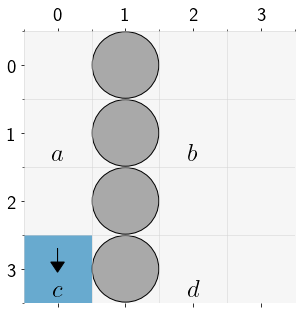

In [9]:
#mcsrl
mcsrl.plot(0)
#for i in range(1):
    #mcsrl.plot(i)

In [10]:
print(np.max(mcsrl.Q[0], axis=4))

[[[[0.98150121 0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]]

  [[0.94561332 0.         0.         0.        ]
   [0.9934791  0.         0.         0.        ]
   [0.99826148 0.         0.         0.        ]
   [0.99978636 0.         0.         0.        ]]

  [[0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.99988435 0.         0.         0.        ]]

  [[0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]]

  [[0.9989158  0.         0.         0.        ]
   [0.9991186  0.         0.         0.        ]
   [0.99930074 0.         0.         0.        ]
   [0.99945332 0.         0.         0.        ]]

  [[0.    